In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

import numpy as np
from keras.preprocessing import image

from py7zr import unpack_7zarchive
import shutil
shutil.register_unpack_format('7zip',['.7z'],unpack_7zarchive)

import os
from os import listdir

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
x_train=x_train/255
x_test=x_test/255

y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

In [2]:
shutil.unpack_archive('train.7z', '/kaggle/temp/')

In [3]:
train_labels = pd.read_csv("trainLabels.csv", header="infer")

classes = train_labels['label'].unique()
print(classes)

['frog' 'truck' 'deer' 'automobile' 'bird' 'horse' 'ship' 'cat' 'dog'
 'airplane']


In [4]:
train_datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=10,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=False,
                             vertical_flip=False,
                             rescale=1./255)

train_generator = train_datagen.flow_from_directory(directory='/kaggle/temp/train/', shuffle=True, target_size=(32,32),batch_size=128)

Found 50000 images belonging to 10 classes.


In [4]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation = 'relu', kernel_initializer='he_uniform', padding='same', input_shape= (32,32,3)))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation = 'relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation = 'relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation = 'relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.3))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation = 'relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation = 'relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.4))

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation = 'relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation = 'relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.5))


cnn.add(tf.keras.layers.Flatten()) 

cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))
#opt = SGD(lr=0.001, momentum=0.9)
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [5]:
hist = cnn.fit(x_train, y_train_cat, validation_data = (x_test,y_test_cat), epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 41s 23ms/step - loss: 1.7449 - accuracy: 0.3950 - val_loss: 1.2079 - val_accuracy: 0.5653
Epoch 2/20
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1551 - accuracy: 0.5884 - val_loss: 0.9499 - val_accuracy: 0.6667
Epoch 3/20
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9367 - accuracy: 0.6721 - val_loss: 0.7527 - val_accuracy: 0.7363
Epoch 4/20
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8186 - accuracy: 0.7156 - val_loss: 0.6950 - val_accuracy: 0.7580
Epoch 5/20
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7229 - accuracy: 0.7528 - val_loss: 0.6162 - val_accuracy: 0.7855
Epoch 6/20
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6562 - accuracy: 0.7779 - val_loss: 0.6132 - val_accuracy: 0.7911
Epoch 7/20
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6000 - accuracy: 0.7959 - val_loss: 0.5382 -

<AxesSubplot:>

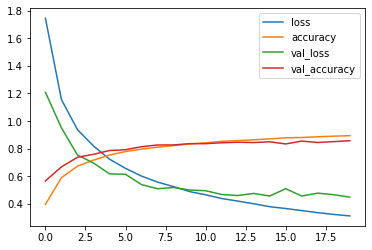

In [6]:
pd.DataFrame(hist.history).plot()

In [7]:
cnn.save('convNN')

INFO:tensorflow:Assets written to: convNN\assets


In [5]:
cnn = tf.keras.models.load_model('convNN')

In [6]:
shutil.unpack_archive('test.7z','/kaggle/temp/test')
shutil.unregister_unpack_format('7zip')

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(directory='/kaggle/temp/test',target_size=(32,32), class_mode=None)

Found 300000 images belonging to 1 classes.


In [10]:
predictions_vecs = cnn.predict(test_gen)
predictions_final = np.argmax(predictions_vecs, axis=1)

In [11]:
print(train_generator.class_indices)

classes = {value:key for (key,value) in train_generator.class_indices.items()}
print(classes)

predicted_classes=np.empty(shape=300000,dtype=np.dtype('U20'))

ind=0
for i in predictions_final.tolist():
    predicted_classes[ind]=classes[i]
    ind=ind+1
    
predicted_classes

{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


array(['bird', 'frog', 'ship', ..., 'truck', 'truck', 'bird'],
      dtype='<U20')

In [12]:
sub = pd.DataFrame(index = range(len(predicted_classes)))
sub.index.name = 'id'
sub.index += 1
sub['label'] = predicted_classes
#ans = ans.assign(Survived = y_pred)
sub.to_csv('Submission.csv')
sub

,label
id,
1,bird
2,frog
3,ship
4,cat
5,bird
...,...
299996,deer
299997,dog
299998,truck
